In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the data frame
url = "https://raw.githubusercontent.com/cchanyu/MachineLearning/main/ClassNotes/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv"
df = pd.read_csv(url, sep=',')
df.head()

,date,x1,x2,x3,x4,x5,mega,mult
0,210302,4,8,13,34,64,18,2.0
1,210226,11,15,37,62,64,5,2.0
2,210223,5,7,9,20,57,15,3.0
3,210219,27,32,47,50,53,4,4.0
4,210216,1,36,44,54,66,10,3.0


In [ ]:
df.columns = ['Date', 'Numbers', 'Bonus','Extra']
df["AllNumbers"] = df["Numbers"].map(str) + " " + df["Bonus"].map(str)
df2 = df.copy()
del df2['Bonus']
del df2['Extra']
del df2['Numbers']
df2.head()

,Date,AllNumbers
0,03/02/2021,04 08 13 34 64 18
1,02/26/2021,11 15 37 62 64 5
2,02/23/2021,05 07 09 20 57 15
3,02/19/2021,27 32 47 50 53 4
4,02/16/2021,01 36 44 54 66 10


In [ ]:
df3 = pd.DataFrame(df2['AllNumbers'].str.split(" ").apply(pd.Series, 0).stack())
df3.index = df3.index.droplevel(-1)
df3.head()

,0
0,04
0,08
0,13
0,34
0,64


In [ ]:
merged = pd.merge(df, df3,  how='inner', left_index=True, right_index=True)
del merged['Numbers']
del merged['AllNumbers']
del merged['Extra']
del merged['Bonus']
merged.columns = ['Date','Number']
merged.reset_index(inplace=True)
merged.head()

,index,Date,Number
0,0,03/02/2021,04
1,0,03/02/2021,08
2,0,03/02/2021,13
3,0,03/02/2021,34
4,0,03/02/2021,64


In [ ]:
dothis = lambda x: pd.Series([i for i in reversed(x.split('/'))])
dates = merged['Date'].apply(dothis)
merged2 = pd.merge(merged, dates,  how='inner', left_index=True, right_index=True)
del merged2['index']
merged2.columns = ['Date','Number','Year','Day','Month']
merged2.head()

,Date,Number,Year,Day,Month
0,03/02/2021,04,2021,02,03
1,03/02/2021,08,2021,02,03
2,03/02/2021,13,2021,02,03
3,03/02/2021,34,2021,02,03
4,03/02/2021,64,2021,02,03


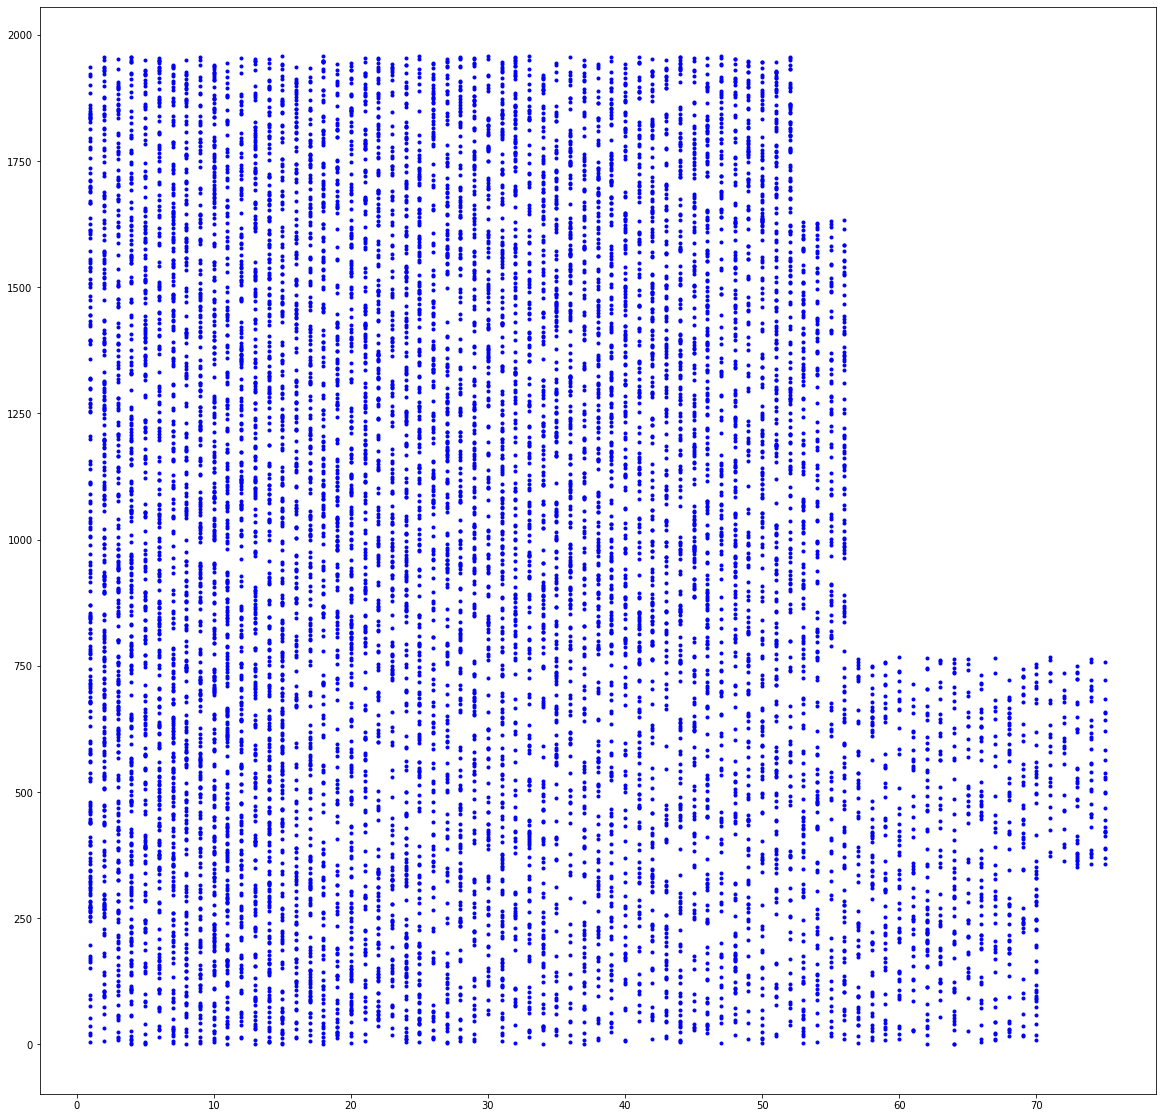

In [ ]:
plt.rc("figure", figsize=(20, 20))
plt.plot(merged['Number'].astype(int).values, merged['index'], 'b.')

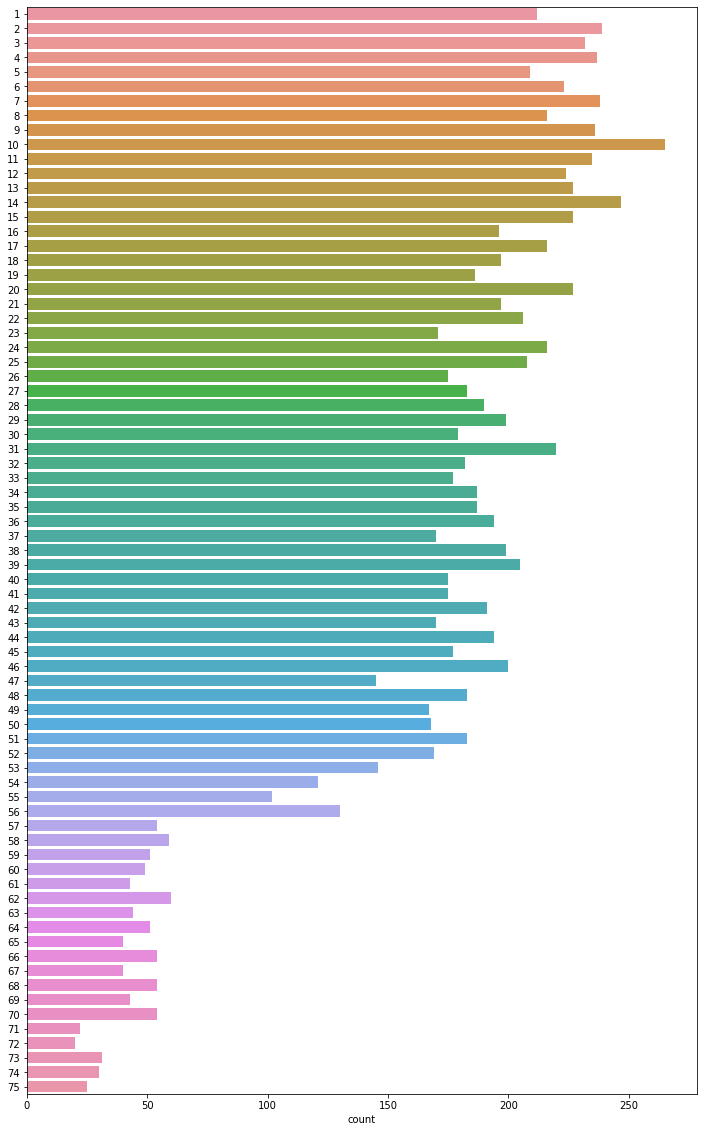

In [ ]:
plt.rc("figure", figsize=(12, 20))
ax = sns.countplot(y= merged2.Number.astype(int).values, data= merged2)